# IronKaggle

Team: John, Lovely, Alex

## Schedule:
- 9am: Introduction, Group organization, framing the problem
- 9.30am: Development time
- 1pm: Lunch break
- 2pm: Back from break
- 3:30pm: You will receive the “real-life” data
- 5pm: Delivery of the dataset with predictions + r2 score + Finish your presentation
- 5:30pm: presentations + winner announcement



## Expected Deliverable
- “Real-life data set” with an extra column called “sales”, with your predictions (in .csv)
- An expected value of R2 of performance of your model
- A 5’ presentation on the choices you did and the road you took

## Deliverables
- A .csv file called with your groupd name (e.g, ‘G1.csv’, ‘G2.csv’)
- The value of R2 you are expecting to get
- Send this in a .zip file containing two elements: the csv file, a txt file with the R2 score inside

## Decisions
- It is supervised learning
- It is a regression problem


# Workflow

## Instal Dependencies

Import libabries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

## Get Data into Phyton

In [2]:
df = pd.read_csv("sales.csv")

df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


## Select Features

In [3]:
print(df.dtypes) #check different df types

print(df.shape)

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object
(640840, 10)


            Unnamed: 0  store_ID  day_of_week  nb_customers_on_day  open  \
date                                                                       
2013-04-18      425390       366            4                  517     1   
2015-04-11      291687       394            6                  694     1   
2013-08-29      411278       807            4                  970     1   
2013-05-28      664714       802            2                  473     1   
2013-10-10      540835       726            4                 1068     1   

            promotion state_holiday  school_holiday  sales  
date                                                        
2013-04-18          0             0               0   4422  
2015-04-11          0             0               0   8297  
2013-08-29          1             0               0   9729  
2013-05-28          1             0               0   6513  
2013-10-10          1             0               0  10882  


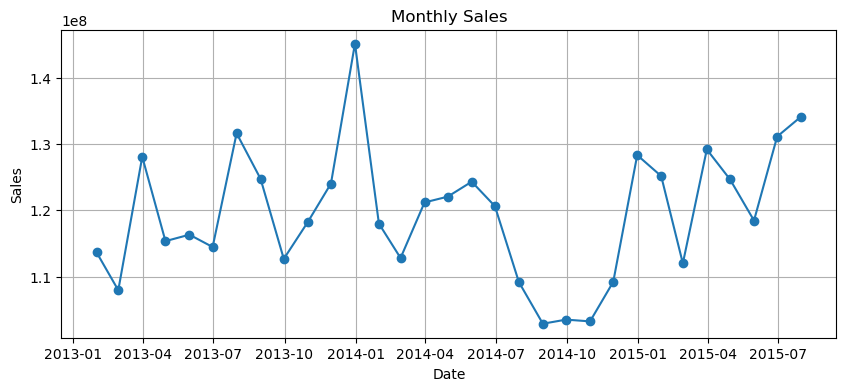

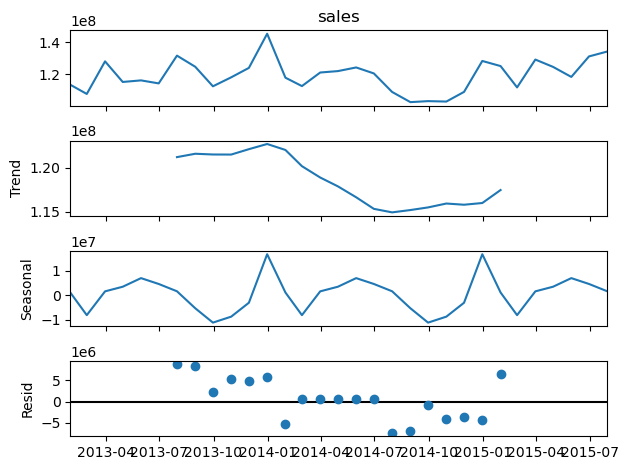

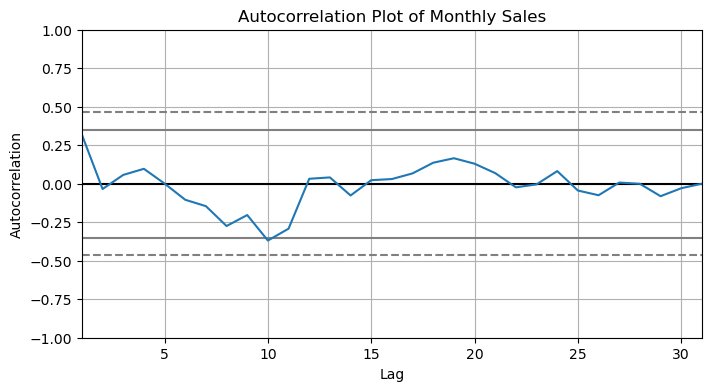

In [47]:
print(df.head())

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
# Step 1: Load CSV and parse dates
df = pd.read_csv('sales.csv', parse_dates=['date'])
# Step 2: Set date column as index
df.set_index('date', inplace=True)
# Step 3: Resample sales data to monthly frequency (sum sales per month)
monthly_sales = df['sales'].resample('M').sum()
# Step 4: Plot monthly sales to visually inspect
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
# Step 5: Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()
# Step 6: Plot autocorrelation to check seasonality patterns
plt.figure(figsize=(8,4))
autocorrelation_plot(monthly_sales)
plt.title('Autocorrelation Plot of Monthly Sales')
plt.show()

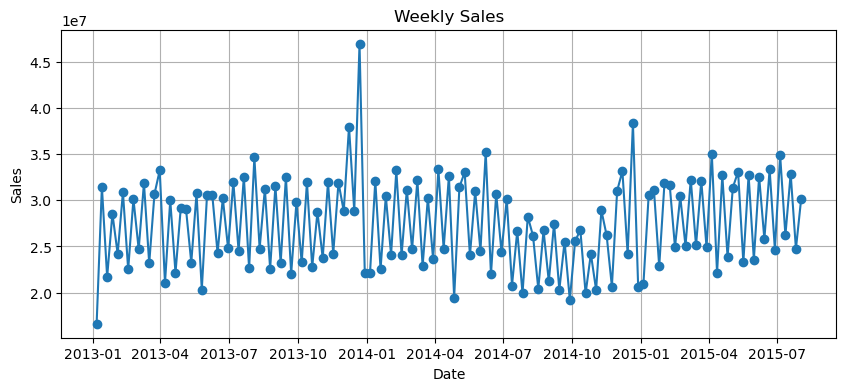

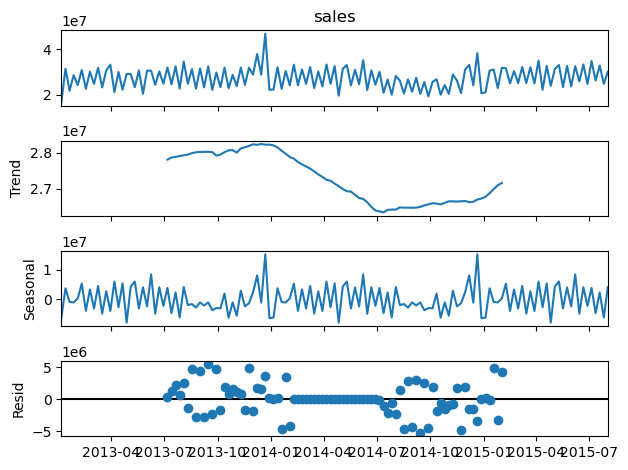

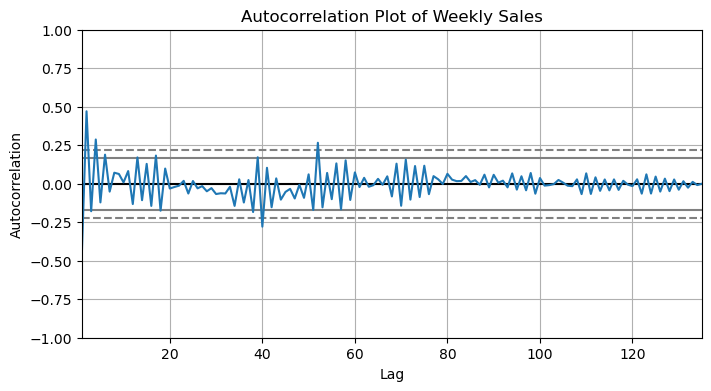

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Load CSV and parse dates
df = pd.read_csv('sales.csv', parse_dates=['date'])

# Set date column as index
df.set_index('date', inplace=True)

# Resample to weekly frequency (sum sales per week)
weekly_sales = df['sales'].resample('W').sum()

# Plot weekly sales
plt.figure(figsize=(10, 4))
plt.plot(weekly_sales, marker='o')
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Decompose weekly time series
# Note: period=52 assumes yearly seasonality with weekly data
result = seasonal_decompose(weekly_sales, model='additive', period=52)
result.plot()
plt.show()

# Plot autocorrelation
plt.figure(figsize=(8, 4))
autocorrelation_plot(weekly_sales)
plt.title('Autocorrelation Plot of Weekly Sales')
plt.show()

In [4]:
df = pd.get_dummies(df, columns=["state_holiday"])


In [5]:
df['date'] = pd.to_datetime(df['date'])

df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

df = df.drop(columns=['date'])  # Only after you've created date_numeric, since it is reperesented in week_of_:year

In [6]:
print(df.dtypes) #check different data types

print(df.shape)

Unnamed: 0             int64
store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
school_holiday         int64
sales                  int64
state_holiday_0         bool
state_holiday_a         bool
state_holiday_b         bool
state_holiday_c         bool
week_of_year           int64
dtype: object
(640840, 13)


## Define X and y

In [7]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop("sales", axis=1)  # features
y = df["sales"]            #target

## Split in Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization of Data

- Learning: Scaling the data does not change R2 in this exercise

In [9]:
print(X_train.describe())

          Unnamed: 0       store_ID    day_of_week  nb_customers_on_day  \
count  512672.000000  512672.000000  512672.000000        512672.000000   
mean   355836.819327     557.885188       4.000798           633.505376   
std    205536.360934     321.898611       1.996979           464.131738   
min         0.000000       1.000000       1.000000             0.000000   
25%    177886.750000     280.000000       2.000000           405.000000   
50%    355650.500000     558.000000       4.000000           610.000000   
75%    533930.250000     836.000000       6.000000           838.000000   
max    712044.000000    1115.000000       7.000000          5458.000000   

                open      promotion  school_holiday   week_of_year  
count  512672.000000  512672.000000   512672.000000  512672.000000  
mean        0.830223       0.381780        0.178085      23.608877  
std         0.375437       0.485824        0.382584      14.442820  
min         0.000000       0.000000        0.000

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test set (don't fit again)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(X_train_scaled_df.describe())

         Unnamed: 0      store_ID   day_of_week  nb_customers_on_day  \
count  5.126720e+05  5.126720e+05  5.126720e+05         5.126720e+05   
mean   1.054854e-16 -1.166701e-16  1.832793e-16         5.983188e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00         1.000001e+00   
min   -1.731261e+00 -1.730004e+00 -1.502670e+00        -1.364927e+00   
25%   -8.657847e-01 -8.632701e-01 -1.001913e+00        -4.923292e-01   
50%   -9.065039e-04  3.566723e-04 -3.994944e-04        -5.064381e-02   
75%    8.664822e-01  8.639835e-01  1.001114e+00         4.405965e-01   
max    1.733063e+00  1.730717e+00  1.501871e+00         1.039468e+01   

               open     promotion  school_holiday  state_holiday_0  \
count  5.126720e+05  5.126720e+05    5.126720e+05     5.126720e+05   
mean  -6.956132e-17  1.292962e-16   -1.679783e-17     2.356132e-18   
std    1.000001e+00  1.000001e+00    1.000001e+00     1.000001e+00   
min   -2.211351e+00 -7.858420e-01   -4.654785e-01    -5.630098e+00   
2

## Fit / Train

In [ ]:
#unscaled

from sklearn.linear_model import LinearRegression

model = LinearRegression() #create model
model.fit(X_train, y_train) #train model

LinearRegression()

In [23]:
#scaled

from sklearn.linear_model import LinearRegression

model = LinearRegression() #create model
model.fit(X_train_scaled_df, y_train) #train model

LinearRegression()

## Predictions

In [ ]:
#unscaled

y_pred = model.predict(X_test)


In [26]:
#unscaled

y_pred_scaled = model.predict(X_test_scaled_df)

## Evaluation Linear regression

In [ ]:
#unscaled

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)

print("R²:", r2)

R²: 0.8515244075004484


In [27]:
#scaled

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred_scaled)

print("R²:", r2)

R²: 0.8515244075004487


## Try different models

### RandomForestRegressor

In [29]:
# unscaled

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print("R²:", r2_score(y_test, model.predict(X_test)))

R²: 0.9538243220413481


In [28]:
# scaled

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled_df, y_train)
print("R²:", r2_score(y_test, model.predict(X_test_scaled_df)))

R²: 0.9538214430595637


### xgboost

In [16]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Evaluate
r2 = r2_score(y_test, y_pred)

print("R²:", r2)


R²: 0.8515244075004484


### Crossvalidation

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Average R²:", scores.mean())

Average R²: 0.904656958580017
